In [8]:
import pandas as pd 
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime

In [9]:
# PIT
pit_HT = pd.read_csv('./pit/pit_HT.csv')
pit_HH = pd.read_csv('./pit/pit_HH.csv')
pit_KT = pd.read_csv('./pit/pit_KT.csv')
pit_LG = pd.read_csv('./pit/pit_LG.csv')
pit_LT = pd.read_csv('./pit/pit_LT.csv')
pit_NC = pd.read_csv('./pit/pit_NC.csv')
pit_OB = pd.read_csv('./pit/pit_OB.csv')
pit_SK = pd.read_csv('./pit/pit_SK.csv')
pit_SS = pd.read_csv('./pit/pit_SS.csv')
pit_WO = pd.read_csv('./pit/pit_WO.csv')

In [344]:
pit_HT.head()

,Unnamed: 0,GDAY_DS,ER,WLS
0,1,2020-05-05,11.0,0.000
1,2,2020-05-06,6.5,0.000
2,3,2020-05-07,6.0,0.333
3,4,2020-05-08,5.5,0.250
4,5,2020-05-09,7.0,0.200


In [10]:
# ER
er_HT = pit_HT.iloc[:,[1,2]]
er_HH = pit_HH.iloc[:,[1,2]]
er_KT = pit_KT.iloc[:,[1,2]]
er_LG = pit_LG.iloc[:,[1,2]]
er_LT = pit_LT.iloc[:,[1,2]]
er_NC = pit_NC.iloc[:,[1,2]]
er_OB = pit_OB.iloc[:,[1,2]]
er_SK = pit_SK.iloc[:,[1,2]]
er_SS = pit_SS.iloc[:,[1,2]]
er_WO = pit_WO.iloc[:,[1,2]]
er_WO.head()

,GDAY_DS,ER
0,2020-05-05,0.000
1,2020-05-06,1.000
2,2020-05-07,3.333
3,2020-05-08,3.250
4,2020-05-09,3.200


In [11]:
# WLS
wls_HT = pit_HT.iloc[:,[1,3]]
wls_HH = pit_HH.iloc[:,[1,3]]
wls_KT = pit_KT.iloc[:,[1,3]]
wls_LG = pit_LG.iloc[:,[1,3]]
wls_LT = pit_LT.iloc[:,[1,3]]
wls_NC = pit_NC.iloc[:,[1,3]]
wls_OB = pit_OB.iloc[:,[1,3]]
wls_SK = pit_SK.iloc[:,[1,3]]
wls_SS = pit_SS.iloc[:,[1,3]]
wls_WO = pit_WO.iloc[:,[1,3]]

In [347]:
wls_HT.loc[:,'WLS']

0      0.000
1      0.000
2      0.333
3      0.250
4      0.200
       ...  
104    0.611
105    0.667
106    0.667
107    0.722
108    0.667
Name: WLS, Length: 109, dtype: float64

In [12]:
# HIT
hit_HT = pd.read_csv('./hit/hit_HT.csv')
hit_HH = pd.read_csv('./hit/hit_HH.csv')
hit_KT = pd.read_csv('./hit/hit_KT.csv')
hit_LG = pd.read_csv('./hit/hit_LG.csv')
hit_LT = pd.read_csv('./hit/hit_LT.csv')
hit_NC = pd.read_csv('./hit/hit_NC.csv')
hit_OB = pd.read_csv('./hit/hit_OB.csv')
hit_SK = pd.read_csv('./hit/hit_SK.csv')
hit_SS = pd.read_csv('./hit/hit_SS.csv')
hit_WO = pd.read_csv('./hit/hit_WO.csv')
hit_WO.head()

,Unnamed: 0,GDAY_DS,BA
0,1,2020-05-05,0.316
1,2,2020-05-06,0.271
2,3,2020-05-07,0.269
3,4,2020-05-08,0.275
4,5,2020-05-09,0.249


In [13]:
# BA
ba_HT = hit_HT.iloc[:,[1,2]]
ba_HH = hit_HH.iloc[:,[1,2]]
ba_KT = hit_KT.iloc[:,[1,2]]
ba_LG = hit_LG.iloc[:,[1,2]]
ba_LT = hit_LT.iloc[:,[1,2]]
ba_NC = hit_NC.iloc[:,[1,2]]
ba_OB = hit_OB.iloc[:,[1,2]]
ba_SK = hit_SK.iloc[:,[1,2]]
ba_SS = hit_SS.iloc[:,[1,2]]
ba_WO = hit_WO.iloc[:,[1,2]]
ba_WO.head()

,GDAY_DS,BA
0,2020-05-05,0.316
1,2020-05-06,0.271
2,2020-05-07,0.269
3,2020-05-08,0.275
4,2020-05-09,0.249


## ER ARIMA

--ER-- <br>
한화 1,2,1 <br>
기아 1,2,1 <br>
kt 0,1,0 <br>
lg 1,1,0 <br>
롯데 1,0,0 <br> 
nc 0,2,1 <br>
두산 2,1,1 <br>
sk 1,0,1  <br>
삼성 1,0,0 <br>
키움 0,1,1 

In [45]:
#한화 자책 3,0,2//2,0,1
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

erHH_model = ARIMA(er_HH.loc[:64,['ER']], order=(2,0,1))
erHH_model_fit = erHH_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(erHH_model_fit.summary()))

erHH_fore = erHH_model_fit.forecast(steps=1)
print(erHH_fore)

                              ARMA Model Results                              
Dep. Variable:                     ER   No. Observations:                   65
Model:                     ARMA(2, 1)   Log Likelihood                 -32.791
Method:                       css-mle   S.D. of innovations              0.385
Date:                Thu, 24 Sep 2020   AIC                             75.582
Time:                        00:32:44   BIC                             86.454
Sample:                             0   HQIC                            79.872
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0273      2.660      1.138      0.255      -2.187       8.242
ar.L1.ER       1.8455      0.135     13.649      0.000       1.580       2.110
ar.L2.ER      -0.8544      0.133     -6.427      0.0

<IPython.core.display.Javascript object>


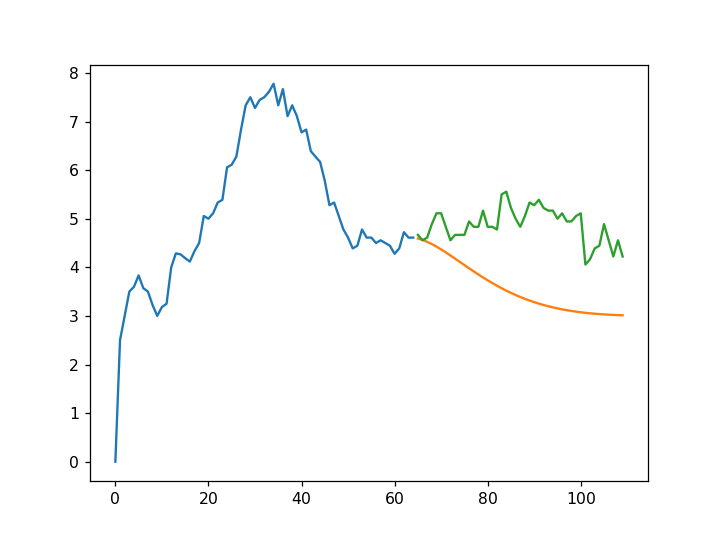

In [46]:
test = er_HH.loc[65:,['ER']]
fore = erHH_model_fit.forecast(steps=len(er_HH.loc[65:,['ER']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(er_HH.loc[:64,'ER'])
plt.plot(forecast)
plt.plot(test)

In [40]:
# 기아 자책 1,2,1//1,1,2
erHT_model = ARIMA(er_HT.loc[:61, ['ER']], order=(1, 1, 2))
erHT_model_fit = erHT_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(erHT_model_fit.summary()))

erHT_fore = erHT_model_fit.forecast(steps=1)
print(erHT_fore)

                             ARIMA Model Results                              
Dep. Variable:                   D.ER   No. Observations:                   61
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 -53.688
Method:                       css-mle   S.D. of innovations              0.573
Date:                Thu, 24 Sep 2020   AIC                            115.375
Time:                        00:31:08   BIC                            123.819
Sample:                             1   HQIC                           118.684
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.ER    -0.8795      0.148     -5.953      0.000      -1.169      -0.590
ma.L1.D.ER     1.1942      0.148      8.071      0.000       0.904       1.484
ma.L2.D.ER     0.7142      0.091      7.838      0.0

<IPython.core.display.Javascript object>


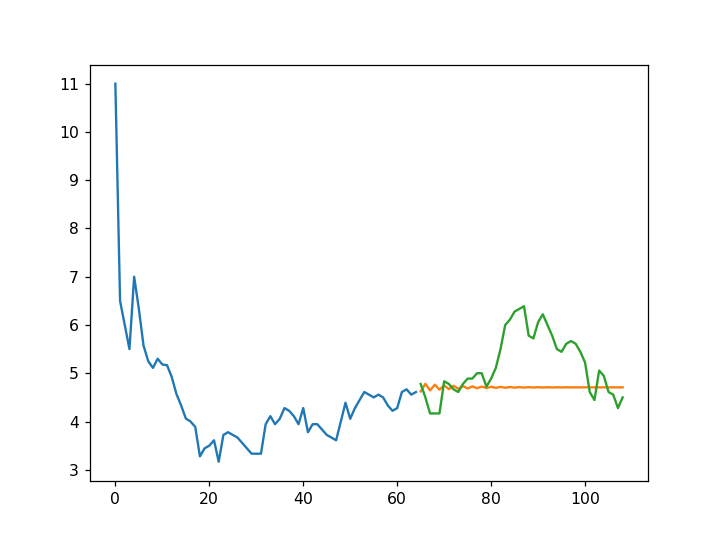

In [44]:
test = er_HT.loc[65:,['ER']]
fore = erHT_model_fit.forecast(steps=len(er_HT.loc[65:,['ER']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(er_HT.loc[:64,'ER'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [35]:
# KT 자책 0,1,0
erKT_model = ARIMA(er_KT.loc[:63, ['ER']], order=(0,1,0))
erKT_model_fit = erKT_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(erKT_model_fit.summary()))

erKT_fore = erKT_model_fit.forecast(steps=1)
print(erKT_fore)

                             ARIMA Model Results                              
Dep. Variable:                   D.ER   No. Observations:                   63
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -28.051
Method:                           css   S.D. of innovations              0.378
Date:                Thu, 24 Sep 2020   AIC                             60.103
Time:                        00:29:09   BIC                             64.389
Sample:                             1   HQIC                            61.788
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0362      0.048     -0.760      0.447      -0.129       0.057

(array([4.68584127]), array([0.37769036]), array([[3.94558177, 5.42610077]]))


<IPython.core.display.Javascript object>


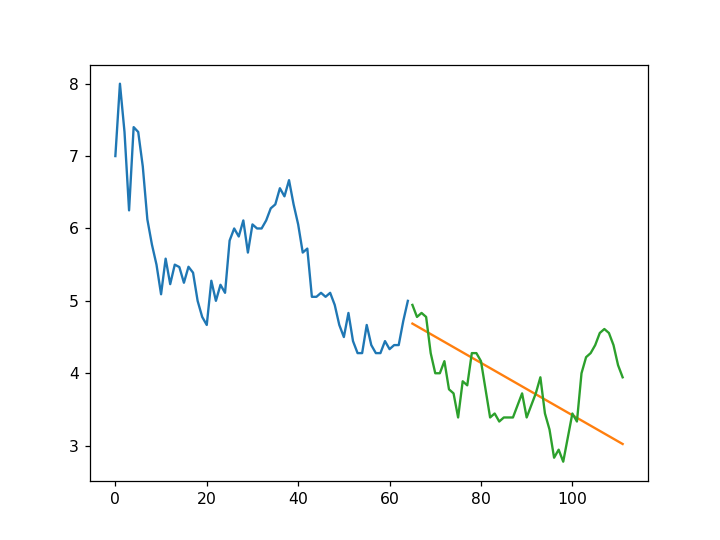

In [37]:
test = er_KT.loc[65:,['ER']]
fore = erKT_model_fit.forecast(steps=len(er_KT.loc[65:,['ER']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(er_KT.loc[:64,'ER'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [38]:
# LG 자책 1,1,0//2,0,0
erLG_model = ARIMA(er_LG.loc[:63, ['ER']], order=(2,0,0))
erLG_model_fit = erLG_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(erLG_model_fit.summary()))

erLG_fore = erLG_model_fit.forecast(steps=1)
print(erLG_fore)

                              ARMA Model Results                              
Dep. Variable:                     ER   No. Observations:                   64
Model:                     ARMA(2, 0)   Log Likelihood                 -36.277
Method:                       css-mle   S.D. of innovations              0.411
Date:                Thu, 24 Sep 2020   AIC                             78.555
Time:                        00:29:37   BIC                             85.032
Sample:                             0   HQIC                            81.106
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.ER       1.3925      0.126     11.030      0.000       1.145       1.640
ar.L2.ER      -0.4009      0.127     -3.156      0.002      -0.650      -0.152
                                    Roots           

<IPython.core.display.Javascript object>


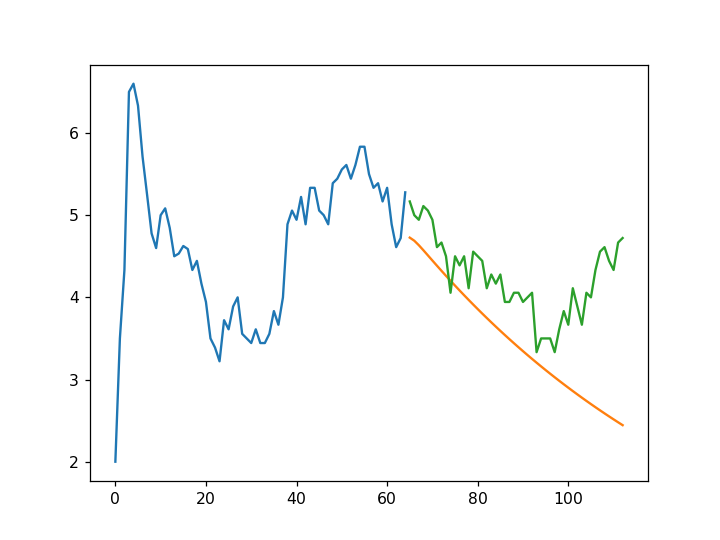

In [39]:
test = er_LG.loc[65:,['ER']]
fore = erLG_model_fit.forecast(steps=len(er_LG.loc[65:,['ER']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(er_LG.loc[:64,'ER'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [151]:
# 꼴떼 1,0,0
erLT_model = ARIMA(er_LT.loc[:61, ['ER']], order=(1, 0, 0))
erLT_model_fit = erLT_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(erLT_model_fit.summary()))

erLT_fore = erLT_model_fit.forecast(steps=1)
print(erLT_fore)

                              ARMA Model Results                              
Dep. Variable:                     ER   No. Observations:                   62
Model:                     ARMA(1, 0)   Log Likelihood                 -29.575
Method:                       css-mle   S.D. of innovations              0.384
Date:                Wed, 23 Sep 2020   AIC                             65.150
Time:                        09:37:57   BIC                             71.531
Sample:                             0   HQIC                            67.655
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2757      0.520      8.216      0.000       3.256       5.296
ar.L1.ER       0.9155      0.064     14.382      0.000       0.791       1.040
                                    Roots           

<IPython.core.display.Javascript object>


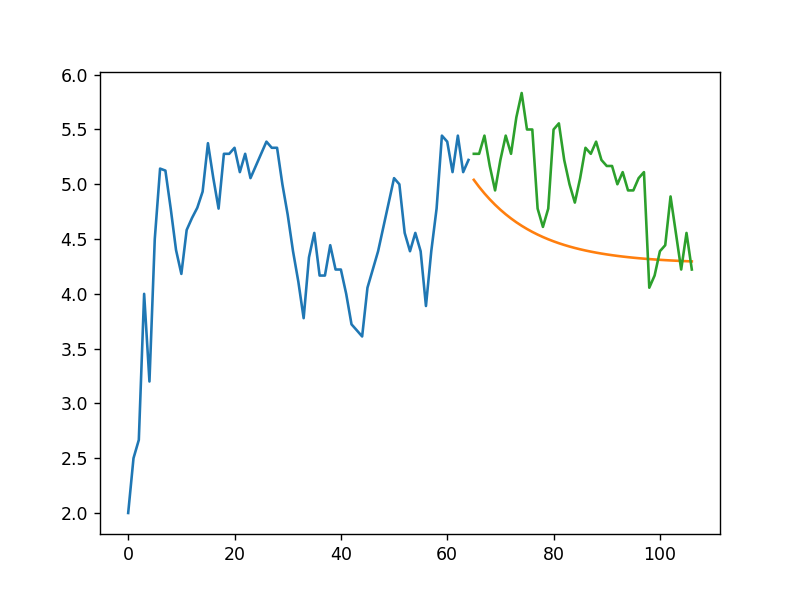

In [189]:
test = er_LT.loc[65:,['ER']]
fore = erLT_model_fit.forecast(steps=len(er_LT.loc[65:,['ER']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(er_LT.loc[:64,'ER'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [155]:
# NC 자책 0,2,1
erNC_model = ARIMA(er_NC.loc[:62, ['ER']], order=(0, 2, 1))
erNC_model_fit = erNC_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(erNC_model_fit.summary()))

erNC_fore = erNC_model_fit.forecast(steps=1)
print(erNC_fore)

                             ARIMA Model Results                              
Dep. Variable:                  D2.ER   No. Observations:                   61
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 -28.720
Method:                       css-mle   S.D. of innovations              0.385
Date:                Wed, 23 Sep 2020   AIC                             61.441
Time:                        09:38:48   BIC                             65.663
Sample:                             2   HQIC                            63.096
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ma.L1.D2.ER    -0.6827      0.128     -5.352      0.000      -0.933      -0.433
                                    Roots                                    
                  Real          Imaginary         

<IPython.core.display.Javascript object>


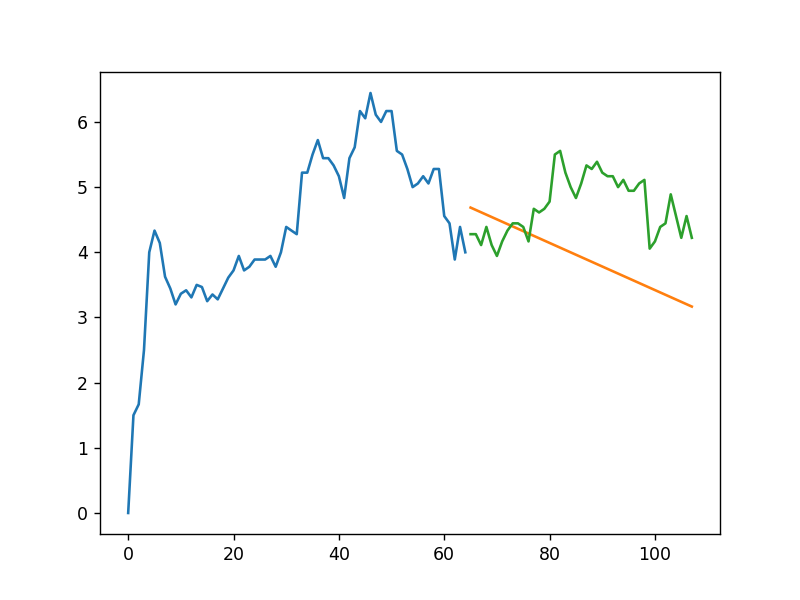

In [187]:
test = er_NC.loc[65:,['ER']]
fore = erKT_model_fit.forecast(steps=len(er_NC.loc[65:,['ER']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(er_NC.loc[:64,'ER'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [162]:
# 두산 2,1,1
erOB_model = ARIMA(er_OB.loc[:63, ['ER']], order=(2, 1, 1))
erOB_model_fit = erOB_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(erOB_model_fit.summary()))

erOB_fore = erOB_model_fit.forecast(steps=1)
print(erOB_fore)

                             ARIMA Model Results                              
Dep. Variable:                   D.ER   No. Observations:                   63
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -42.798
Method:                       css-mle   S.D. of innovations              0.468
Date:                Wed, 23 Sep 2020   AIC                             93.595
Time:                        09:40:47   BIC                            102.168
Sample:                             1   HQIC                            96.967
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.ER     0.6796      0.168      4.038      0.000       0.350       1.010
ar.L2.D.ER    -0.8092      0.119     -6.781      0.000      -1.043      -0.575
ma.L1.D.ER    -0.5650      0.132     -4.283      0.0

<IPython.core.display.Javascript object>


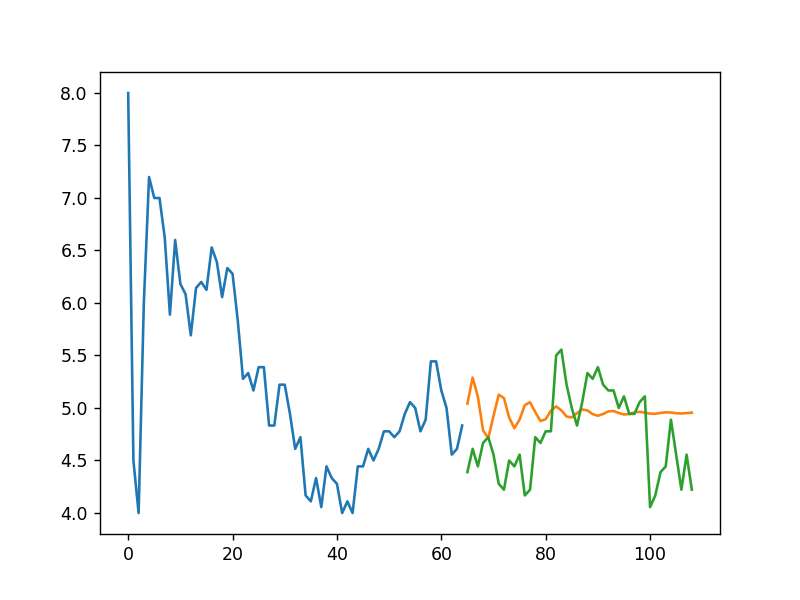

In [186]:
test = er_OB.loc[65:,['ER']]
fore = erOB_model_fit.forecast(steps=len(er_OB.loc[65:,['ER']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(er_OB.loc[:64,'ER'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [171]:
# SK 1,0,1
erSK_model = ARIMA(er_SK.loc[:64, ['ER']], order=(1, 0, 1))
erSK_model_fit = erSK_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(erSK_model_fit.summary()))

erSK_fore = erSK_model_fit.forecast(steps=1)
print(erSK_fore)

                              ARMA Model Results                              
Dep. Variable:                     ER   No. Observations:                   65
Model:                     ARMA(1, 1)   Log Likelihood                 -25.423
Method:                       css-mle   S.D. of innovations              0.354
Date:                Wed, 23 Sep 2020   AIC                             58.846
Time:                        09:42:56   BIC                             67.543
Sample:                             0   HQIC                            62.277
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6382      0.229     20.288      0.000       4.190       5.086
ar.L1.ER       0.7509      0.121      6.202      0.000       0.514       0.988
ma.L1.ER       0.3453      0.214      1.615      0.1

45


<IPython.core.display.Javascript object>


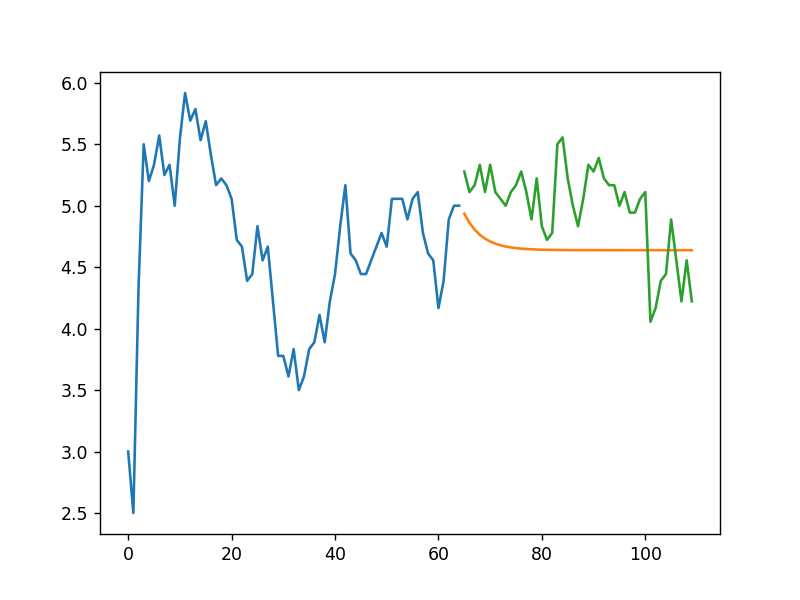

In [185]:
test = er_SK.loc[65:,['ER']]
fore = erSK_model_fit.forecast(steps=len(er_SK.loc[65:,['ER']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(er_SK.loc[:64,'ER'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [176]:
# 삼성 1,0,0
erSS_model = ARIMA(er_SS.loc[:64, ['ER']], order=(1, 0, 0))
erSS_model_fit = erSS_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(erSS_model_fit.summary()))

erSS_fore = erSS_model_fit.forecast(steps=1)
print(erSS_fore)

                              ARMA Model Results                              
Dep. Variable:                     ER   No. Observations:                   65
Model:                     ARMA(1, 0)   Log Likelihood                 -17.993
Method:                       css-mle   S.D. of innovations              0.317
Date:                Wed, 23 Sep 2020   AIC                             41.987
Time:                        09:44:29   BIC                             48.510
Sample:                             0   HQIC                            44.561
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2575      0.181     23.572      0.000       3.904       4.612
ar.L1.ER       0.7944      0.072     11.009      0.000       0.653       0.936
                                    Roots           

<IPython.core.display.Javascript object>


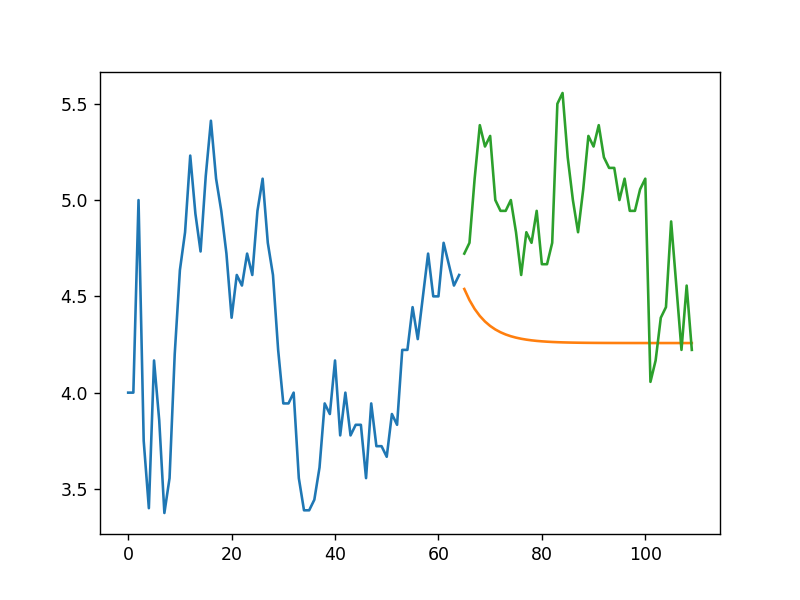

In [181]:
test = er_SS.loc[65:,['ER']]
fore = erSS_model_fit.forecast(steps=len(er_SS.loc[65:,['ER']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(er_SS.loc[:64,'ER'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [182]:
# 키움 0,1,1
erWO_model = ARIMA(er_WO.loc[:65, ['ER']], order=(0, 1, 1))
erWO_model_fit = erWO_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(erWO_model_fit.summary()))

erWO_fore = erWO_model_fit.forecast(steps=1)
print(erWO_fore)

                             ARIMA Model Results                              
Dep. Variable:                   D.ER   No. Observations:                   65
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -29.184
Method:                       css-mle   S.D. of innovations              0.379
Date:                Wed, 23 Sep 2020   AIC                             62.368
Time:                        09:45:58   BIC                             66.717
Sample:                             1   HQIC                            64.084
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.D.ER     0.3768      0.127      2.968      0.003       0.128       0.626
                                    Roots                                    
                  Real          Imaginary           M

<IPython.core.display.Javascript object>


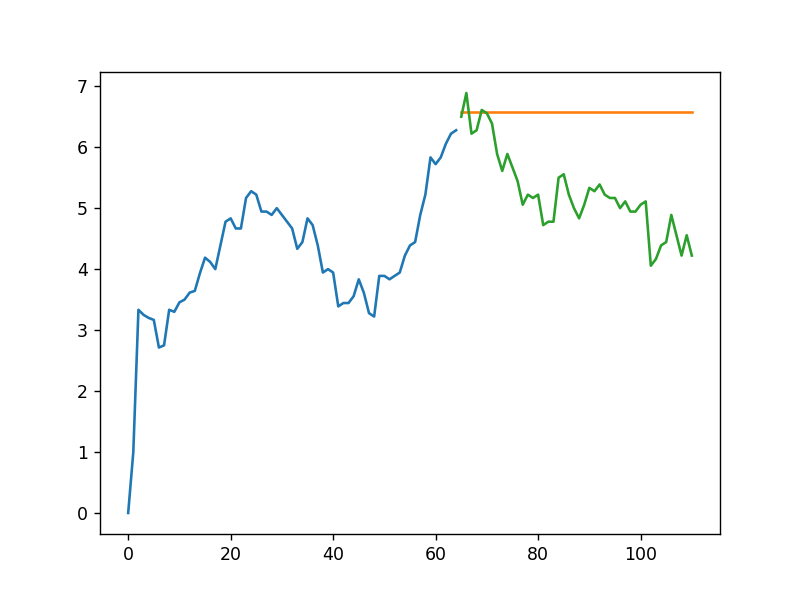

In [184]:
test = er_WO.loc[65:,['ER']]
fore = erWO_model_fit.forecast(steps=len(er_WO.loc[65:,['ER']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(er_WO.loc[:64,'ER'])
plt.plot(forecast)
plt.plot(test)
plt.show()

## WLS

--WLS-- <br>
한화 1,2,1 <br>
기아 0,1,0 <br>
KT 0,1,0 <br>
엘지 0,1,3 <br>
롯데 0,1,0 <br>
NC 0,1,0 <br>
두산 0,0,1 <br>
SK 0,1,0 <br>
삼성 2,1,2 <br>
키움 1,0,0 <br>


In [47]:
# 한화 승률 1,2,1/3,0,2
wlsHH_model = ARIMA(wls_HH.loc[:64, ['WLS']], order=(3,0,2))
wlsHH_model_fit = wlsHH_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(wlsHH_model_fit.summary()))

wlsHH_fore = wlsHH_model_fit.forecast(steps=1)
print(wlsHH_fore)

                              ARMA Model Results                              
Dep. Variable:                    WLS   No. Observations:                   65
Model:                     ARMA(3, 2)   Log Likelihood                  77.371
Method:                       css-mle   S.D. of innovations              0.071
Date:                Thu, 24 Sep 2020   AIC                           -142.741
Time:                        00:34:36   BIC                           -129.695
Sample:                             0   HQIC                          -137.594
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.WLS      0.2311      0.195      1.186      0.235      -0.151       0.613
ar.L2.WLS      0.7662        nan        nan        nan         nan         nan
ar.L3.WLS     -0.0334        nan        nan        n

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<IPython.core.display.Javascript object>


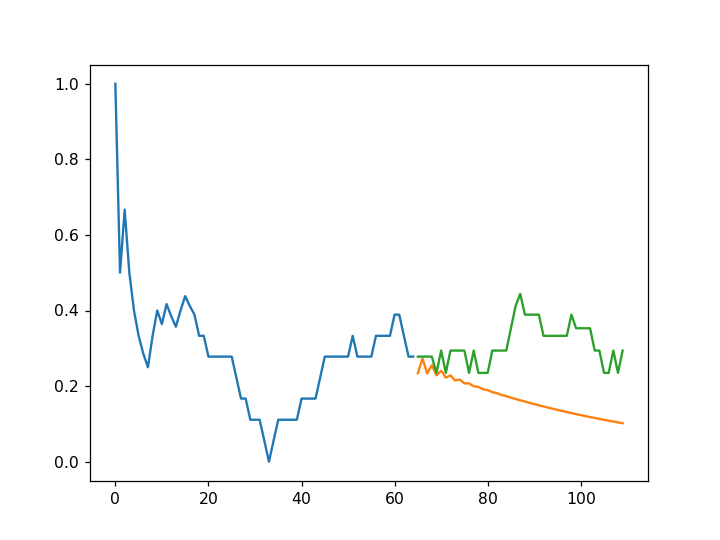

In [48]:
test = wls_HH.loc[65:,['WLS']]
fore = wlsHH_model_fit.forecast(steps=len(wls_HH.loc[65:,['WLS']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(wls_HH.loc[:64,'WLS'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [49]:
# 기아 0,1,0 // 
wlsHT_model = ARIMA(wls_HT.loc[:61, ['WLS']], order=(0, 1, 0))
wlsHT_model_fit = wlsHT_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(wlsHT_model_fit.summary()))

wlsHT_fore = wlsHT_model_fit.forecast(steps=1)
print(wlsHT_fore)

                             ARIMA Model Results                              
Dep. Variable:                  D.WLS   No. Observations:                   61
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  82.894
Method:                           css   S.D. of innovations              0.062
Date:                Thu, 24 Sep 2020   AIC                           -161.788
Time:                        00:35:03   BIC                           -157.566
Sample:                             1   HQIC                          -160.134
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0082      0.008      1.030      0.303      -0.007       0.024

(array([0.50819672]), array([0.06217158]), array([[0.38634266, 0.63005078]]))


<IPython.core.display.Javascript object>


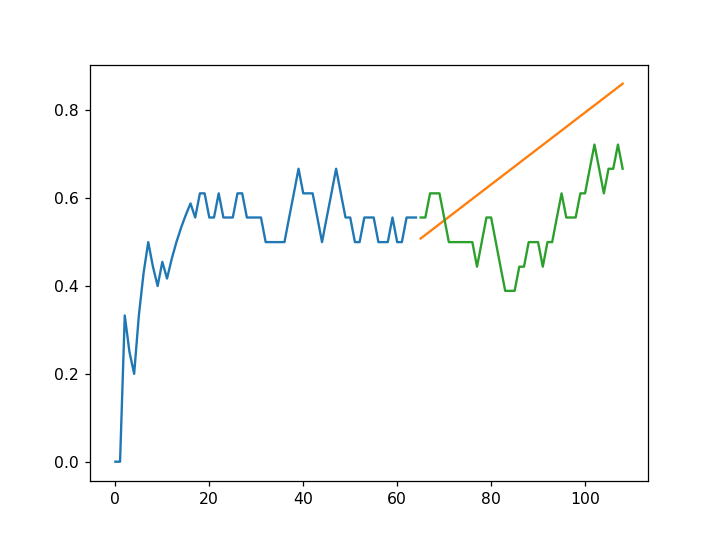

In [50]:
test = wls_HT.loc[65:,['WLS']]
fore = wlsHT_model_fit.forecast(steps=len(wls_HT.loc[65:,['WLS']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(wls_HT.loc[:64,'WLS'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [294]:
wlsKT_model = ARIMA(wls_KT.loc[:63, ['WLS']], order=(0, 1, 0))
wlsKT_model_fit = wlsKT_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(wlsKT_model_fit.summary()))

wlsKT_fore = wlsKT_model_fit.forecast(steps=1)
print(wlsKT_fore)

                             ARIMA Model Results                              
Dep. Variable:                  D.WLS   No. Observations:                   63
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  97.427
Method:                           css   S.D. of innovations              0.052
Date:                Wed, 23 Sep 2020   AIC                           -190.855
Time:                        11:13:49   BIC                           -186.569
Sample:                             1   HQIC                          -189.169
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0103      0.006      1.582      0.114      -0.002       0.023

(array([0.65726984]), array([0.05153954]), array([[0.5562542 , 0.75828548]]))


<IPython.core.display.Javascript object>


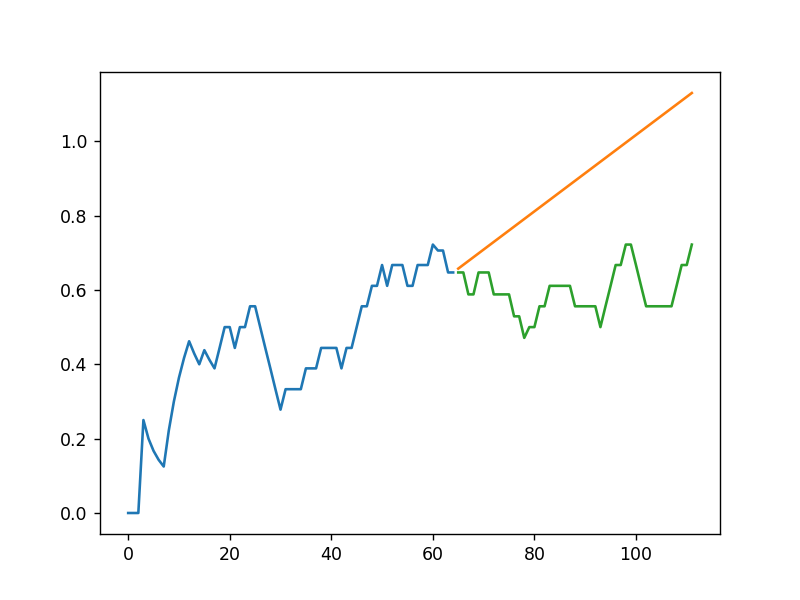

In [295]:
test = wls_KT.loc[65:,['WLS']]
fore = wlsKT_model_fit.forecast(steps=len(wls_KT.loc[65:,['WLS']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(wls_KT.loc[:64,'WLS'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [51]:
# LG 0,1,3 // 2, 0, 0

wlsLG_model = ARIMA(wls_LG.loc[:63, ['WLS']], order=(2, 0, 0))
wlsLG_model_fit = wlsLG_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(wlsLG_model_fit.summary()))

wlsLG_fore = wlsLG_model_fit.forecast(steps=1)
print(wlsLG_fore)


                              ARMA Model Results                              
Dep. Variable:                    WLS   No. Observations:                   64
Model:                     ARMA(2, 0)   Log Likelihood                  78.638
Method:                       css-mle   S.D. of innovations              0.069
Date:                Thu, 24 Sep 2020   AIC                           -149.276
Time:                        00:36:24   BIC                           -140.640
Sample:                             0   HQIC                          -145.874
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5858      0.062      9.495      0.000       0.465       0.707
ar.L1.WLS      1.5570      0.155     10.048      0.000       1.253       1.861
ar.L2.WLS     -0.7020      0.152     -4.622      0.0

<IPython.core.display.Javascript object>


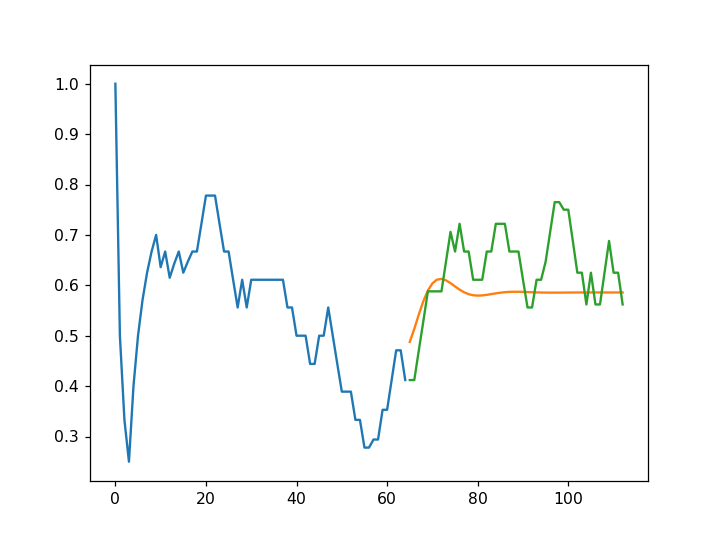

In [52]:
test = wls_LG.loc[65:,['WLS']]
fore = wlsLG_model_fit.forecast(steps=len(wls_LG.loc[65:,['WLS']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(wls_LG.loc[:64,'WLS'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [53]:
# 롯데 0, 2, 1// 1,0,3
wlsLT_model = ARIMA(wls_LT.loc[:61, ['WLS']], order=(1, 0, 3))
wlsLT_model_fit = wlsLT_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(wlsLT_model_fit.summary()))

wlsLT_fore = wlsLT_model_fit.forecast(steps=1)
print(wlsLT_fore)

                              ARMA Model Results                              
Dep. Variable:                    WLS   No. Observations:                   62
Model:                     ARMA(1, 3)   Log Likelihood                 106.565
Method:                       css-mle   S.D. of innovations              0.040
Date:                Thu, 24 Sep 2020   AIC                           -201.131
Time:                        00:37:11   BIC                           -188.368
Sample:                             0   HQIC                          -196.120
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6048      0.118      5.124      0.000       0.373       0.836
ar.L1.WLS      0.9178      0.052     17.788      0.000       0.817       1.019
ma.L1.WLS     -0.0507      0.108     -0.471      0.6

<IPython.core.display.Javascript object>


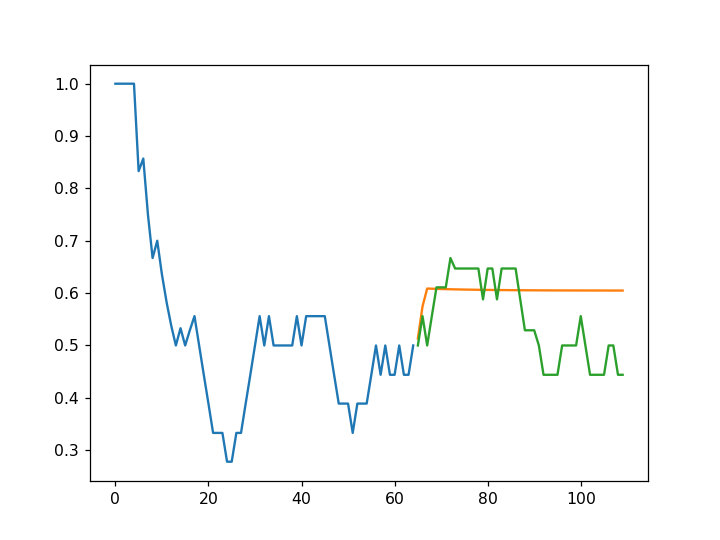

In [54]:
test = wls_LT.loc[65:,['WLS']]
fore = wlsLT_model_fit.forecast(steps=len(wls_LT.loc[65:,['WLS']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(wls_LT.loc[:64,'WLS'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [55]:
# NC 0,1,0
wlsNC_model = ARIMA(wls_NC.loc[:62, ['WLS']], order=(0, 1, 0))
wlsNC_model_fit = wlsNC_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(wlsNC_model_fit.summary()))

wlsNC_fore = wlsNC_model_fit.forecast(steps=1)
print(wlsNC_fore)

                             ARIMA Model Results                              
Dep. Variable:                  D.WLS   No. Observations:                   62
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 106.712
Method:                           css   S.D. of innovations              0.043
Date:                Thu, 24 Sep 2020   AIC                           -209.424
Time:                        00:38:32   BIC                           -205.170
Sample:                             1   HQIC                          -207.754
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0050      0.005     -0.916      0.360      -0.016       0.006

(array([0.68296774]), array([0.04327853]), array([[0.59814338, 0.7677921 ]]))


<IPython.core.display.Javascript object>


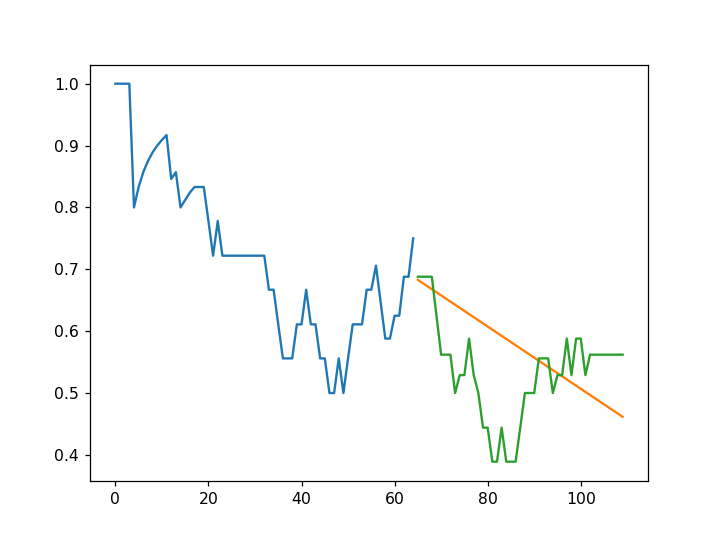

In [56]:
test = wls_NC.loc[65:,['WLS']]
fore = wlsNC_model_fit.forecast(steps=len(wls_NC.loc[65:,['WLS']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(wls_NC.loc[:64,'WLS'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [57]:
# OB 0, 0, 1//4,1,1

wlsOB_model = ARIMA(wls_OB.loc[:63, ['WLS']], order=(4,1,1))
wlsOB_model_fit = wlsOB_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(wlsOB_model_fit.summary()))

wlsOB_fore = wlsOB_model_fit.forecast(steps=1)
print(wlsOB_fore)

                             ARIMA Model Results                              
Dep. Variable:                  D.WLS   No. Observations:                   63
Model:                 ARIMA(4, 1, 1)   Log Likelihood                  81.394
Method:                       css-mle   S.D. of innovations              0.065
Date:                Thu, 24 Sep 2020   AIC                           -148.788
Time:                        00:39:38   BIC                           -133.786
Sample:                             1   HQIC                          -142.887
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0053      0.008      0.702      0.483      -0.010       0.020
ar.L1.D.WLS     0.7866      0.286      2.752      0.006       0.226       1.347
ar.L2.D.WLS    -0.4724      0.193     -2.447    

<IPython.core.display.Javascript object>


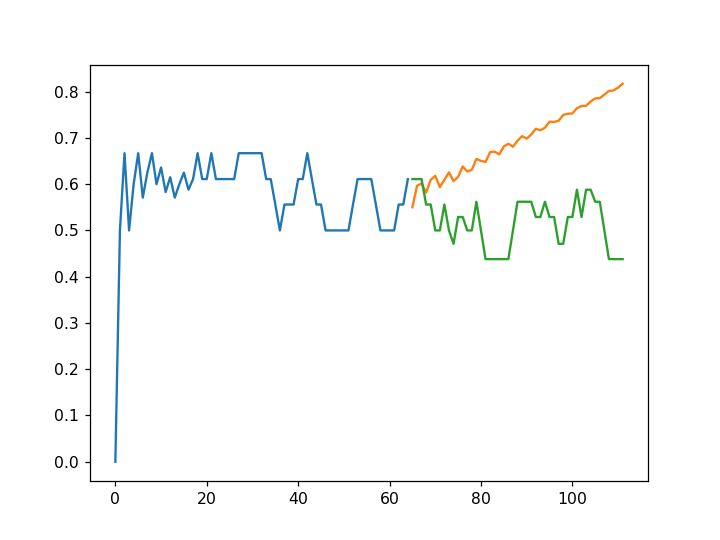

In [61]:
test = wls_OB.loc[65:,['WLS']]
fore = wlsOB_model_fit.forecast(steps=len(wls_OB.loc[65:,['WLS']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(wls_OB.loc[:64,'WLS'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [62]:
# SK 0,1,0

wlsSK_model = ARIMA(wls_SK.loc[:64, ['WLS']], order=(0, 1, 0))
wlsSK_model_fit = wlsSK_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(wlsSK_model_fit.summary()))

wlsSK_fore = wlsSK_model_fit.forecast(steps=1)
print(wlsSK_fore)

                             ARIMA Model Results                              
Dep. Variable:                  D.WLS   No. Observations:                   64
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  74.657
Method:                           css   S.D. of innovations              0.075
Date:                Thu, 24 Sep 2020   AIC                           -145.315
Time:                        00:42:00   BIC                           -140.997
Sample:                             1   HQIC                          -143.614
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0061      0.009      0.645      0.519      -0.012       0.025

(array([0.39507813]), array([0.07536128]), array([[0.24737274, 0.54278351]]))


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>


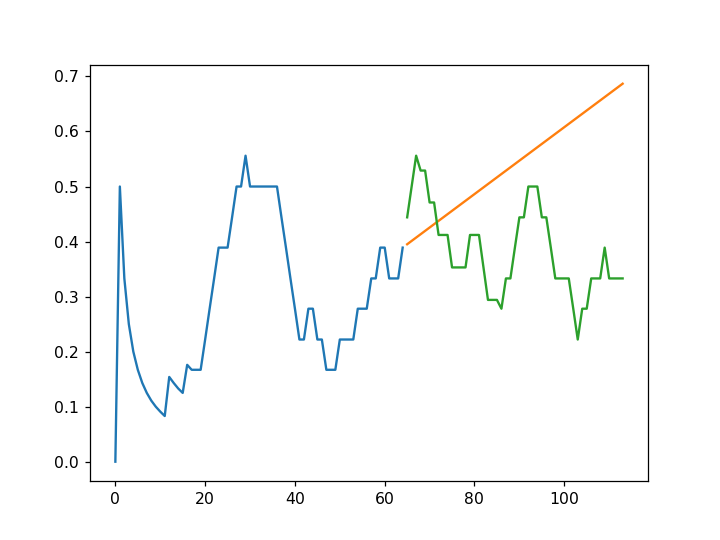

In [63]:
test = wls_SK.loc[65:,['WLS']]
fore = wlsSK_model_fit.forecast(steps=len(wls_SK.loc[65:,['WLS']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(wls_SK.loc[:64,'WLS'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [65]:
# 삼성 2,1,2 // 0,1,0 
wlsSS_model = ARIMA(wls_SS.loc[:64, ['WLS']], order=(0,1,0))
wlsSS_model_fit = wlsSS_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(wlsSS_model_fit.summary()))

wlsSS_fore = wlsSS_model_fit.forecast(steps=1)
print(wlsSS_fore)

                             ARIMA Model Results                              
Dep. Variable:                  D.WLS   No. Observations:                   64
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  97.571
Method:                           css   S.D. of innovations              0.053
Date:                Thu, 24 Sep 2020   AIC                           -191.142
Time:                        00:43:01   BIC                           -186.824
Sample:                             1   HQIC                          -189.441
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0087      0.007      1.319      0.187      -0.004       0.022

(array([0.5646875]), array([0.05268179]), array([[0.46143309, 0.66794191]]))


<IPython.core.display.Javascript object>


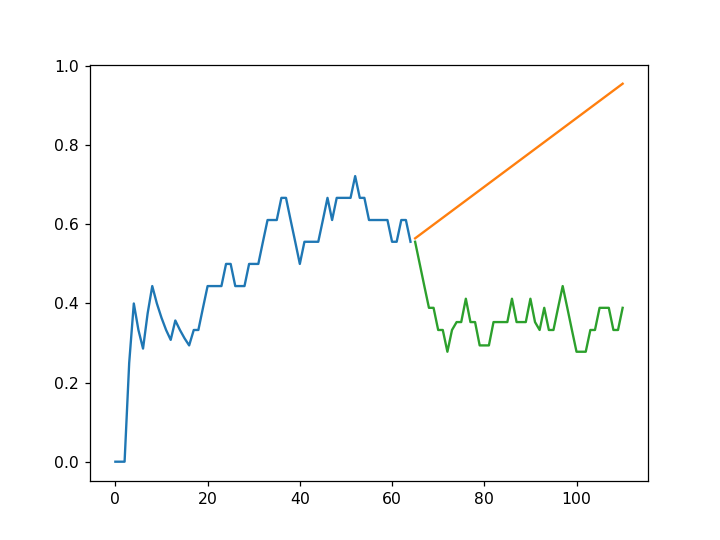

In [66]:
test = wls_SS.loc[65:,['WLS']]
fore = wlsSS_model_fit.forecast(steps=len(wls_SS.loc[65:,['WLS']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(wls_SS.loc[:64,'WLS'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [67]:
# 키움 1,0,0
wlsWO_model = ARIMA(wls_WO.loc[:64, ['WLS']], order=(1, 0, 0))
wlsWO_model_fit = wlsWO_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(wlsWO_model_fit.summary()))

wlsWO_fore = wlsWO_model_fit.forecast(steps=1)
print(wlsWO_fore)

                              ARMA Model Results                              
Dep. Variable:                    WLS   No. Observations:                   65
Model:                     ARMA(1, 0)   Log Likelihood                  91.626
Method:                       css-mle   S.D. of innovations              0.058
Date:                Thu, 24 Sep 2020   AIC                           -177.252
Time:                        00:43:49   BIC                           -170.729
Sample:                             0   HQIC                          -174.678
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6635      0.094      7.032      0.000       0.479       0.848
ar.L1.WLS      0.9345      0.051     18.404      0.000       0.835       1.034
                                    Roots           

<IPython.core.display.Javascript object>


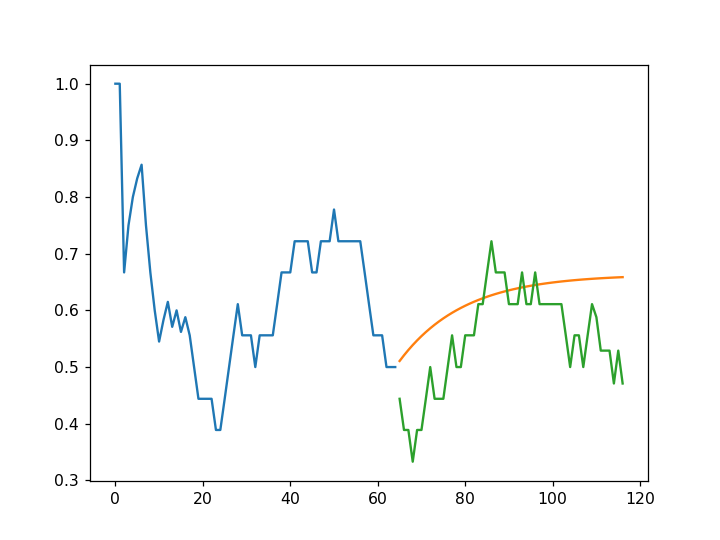

In [68]:
test = wls_WO.loc[65:,['WLS']]
fore = wlsWO_model_fit.forecast(steps=len(wls_WO.loc[65:,['WLS']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(wls_WO.loc[:64,'WLS'])
plt.plot(forecast)
plt.plot(test)
plt.show()

## BA ARIMA

--BA-- <br> 
HH 3,1,0 <br>
HT 0,1,0 <br>
KT 1,0,2 <br>
LG 3,1,0 <br>
LT 1,1,0 <br>
NC 0,2,1 <br>
OB 1,0,1 <br>
SK 2,1,0 <br>
SS 0,2,1 <br>
WO 0,1,0 <br>


In [357]:
baHH_model = ARIMA(ba_HH.loc[:64, ['BA']], order=(3, 1, 0))
baHH_model_fit = baHH_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(baHH_model_fit.summary()))

baHH_fore = baHH_model_fit.forecast(steps=1)
print(baHH_fore)

                             ARIMA Model Results                              
Dep. Variable:                   D.BA   No. Observations:                   64
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 214.847
Method:                       css-mle   S.D. of innovations              0.008
Date:                Wed, 23 Sep 2020   AIC                           -421.694
Time:                        11:46:56   BIC                           -413.058
Sample:                             1   HQIC                          -418.292
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.BA    -0.6226      0.125     -4.982      0.000      -0.868      -0.378
ar.L2.D.BA     0.3932      0.159      2.471      0.013       0.081       0.705
ar.L3.D.BA     0.2838      0.165      1.718      0.0

<IPython.core.display.Javascript object>


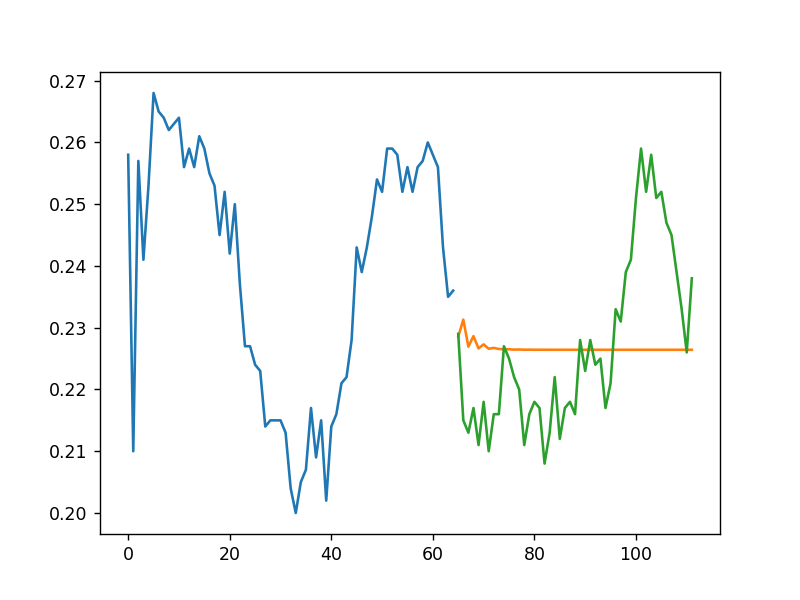

In [361]:
test = ba_HH.loc[65:,['BA']]
fore = baHH_model_fit.forecast(steps=len(ba_HH.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_HH.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [359]:
baHT_model = ARIMA(ba_HT.loc[:61, ['BA']], order=(0, 1, 0))
baHT_model_fit = baHT_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(baHT_model_fit.summary()))

baHT_fore = baHT_model_fit.forecast(steps=1)
print(baHT_fore)

                             ARIMA Model Results                              
Dep. Variable:                   D.BA   No. Observations:                   61
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 179.701
Method:                           css   S.D. of innovations              0.013
Date:                Wed, 23 Sep 2020   AIC                           -355.401
Time:                        11:47:18   BIC                           -351.180
Sample:                             1   HQIC                          -353.747
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.002      0.846      0.398      -0.002       0.005

(array([0.27337705]), array([0.01271654]), array([[0.2484531, 0.298301 ]]))


<IPython.core.display.Javascript object>


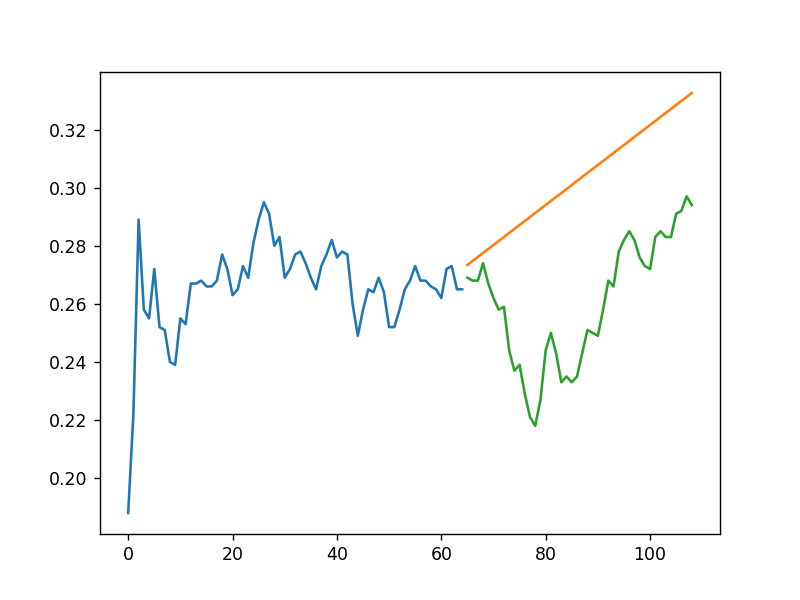

In [363]:
test = ba_HT.loc[65:,['BA']]
fore = baHT_model_fit.forecast(steps=len(ba_HT.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_HT.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [365]:
baKT_model = ARIMA(ba_KT.loc[:63, ['BA']], order=(1, 0, 2))
baKT_model_fit = baKT_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(baKT_model_fit.summary()))

baKT_fore = baKT_model_fit.forecast(steps=1)
print(baKT_fore)

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

<IPython.core.display.Javascript object>


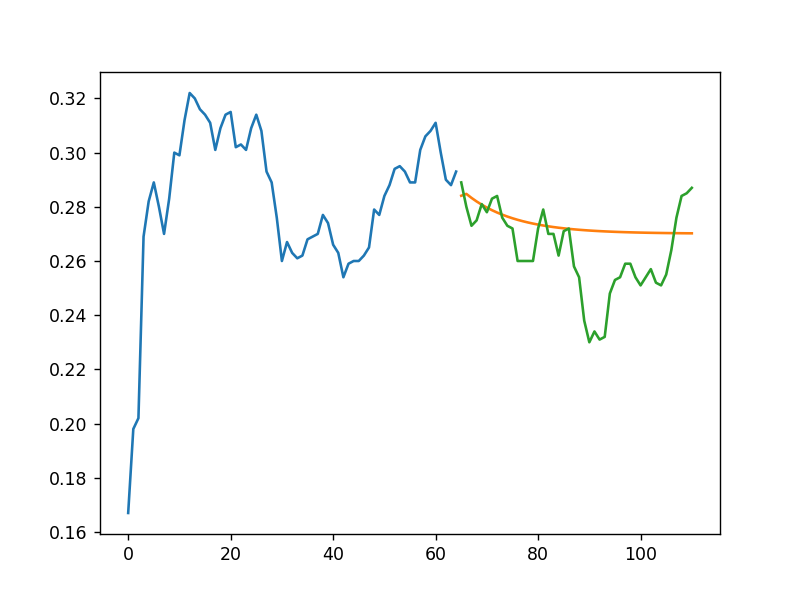

In [366]:
test = ba_KT.loc[65:,['BA']]
fore = baKT_model_fit.forecast(steps=len(ba_KT.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_KT.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [369]:
baLG_model = ARIMA(ba_LG.loc[:63, ['BA']], order=(3, 1, 0))
baLG_model_fit = baLG_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(baLG_model_fit.summary()))

baLG_fore = baLG_model_fit.forecast(steps=1)
print(baLG_fore)

                             ARIMA Model Results                              
Dep. Variable:                   D.BA   No. Observations:                   63
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 196.167
Method:                       css-mle   S.D. of innovations              0.011
Date:                Wed, 23 Sep 2020   AIC                           -384.335
Time:                        11:48:50   BIC                           -375.762
Sample:                             1   HQIC                          -380.963
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.BA     0.2837      0.194      1.465      0.143      -0.096       0.663
ar.L2.D.BA    -0.0653      0.190     -0.343      0.732      -0.438       0.308
ar.L3.D.BA    -0.5147      0.174     -2.952      0.0

<IPython.core.display.Javascript object>


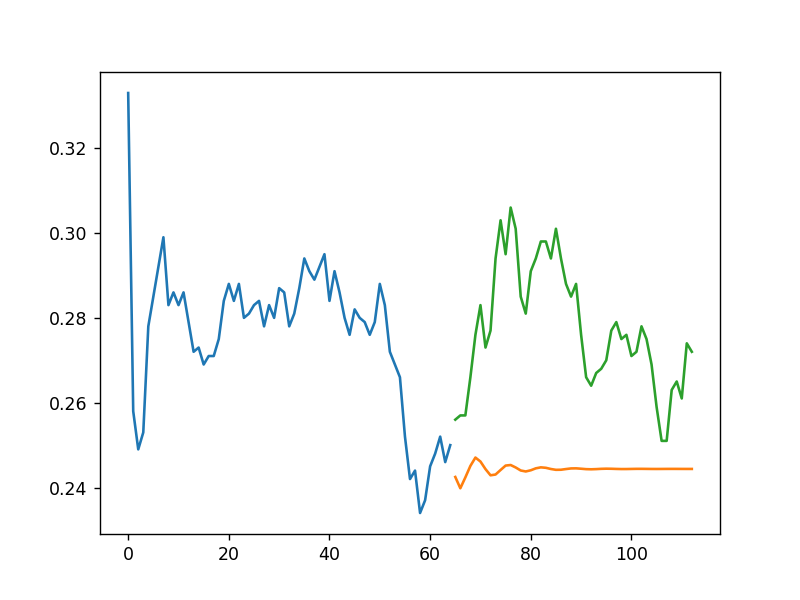

In [370]:
test = ba_LG.loc[65:,['BA']]
fore = baLG_model_fit.forecast(steps=len(ba_LG.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_LG.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [372]:
baLT_model = ARIMA(ba_LT.loc[:61, ['BA']], order=(1, 1, 0))
baLT_model_fit = baLT_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(baLT_model_fit.summary()))

baLT_fore = baLT_model_fit.forecast(steps=1)
print(baLT_fore[0])

                             ARIMA Model Results                              
Dep. Variable:                   D.BA   No. Observations:                   61
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 198.905
Method:                       css-mle   S.D. of innovations              0.009
Date:                Wed, 23 Sep 2020   AIC                           -393.810
Time:                        11:49:20   BIC                           -389.589
Sample:                             1   HQIC                          -392.156
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.BA     0.6104      0.154      3.956      0.000       0.308       0.913
                                    Roots                                    
                  Real          Imaginary           M

<IPython.core.display.Javascript object>


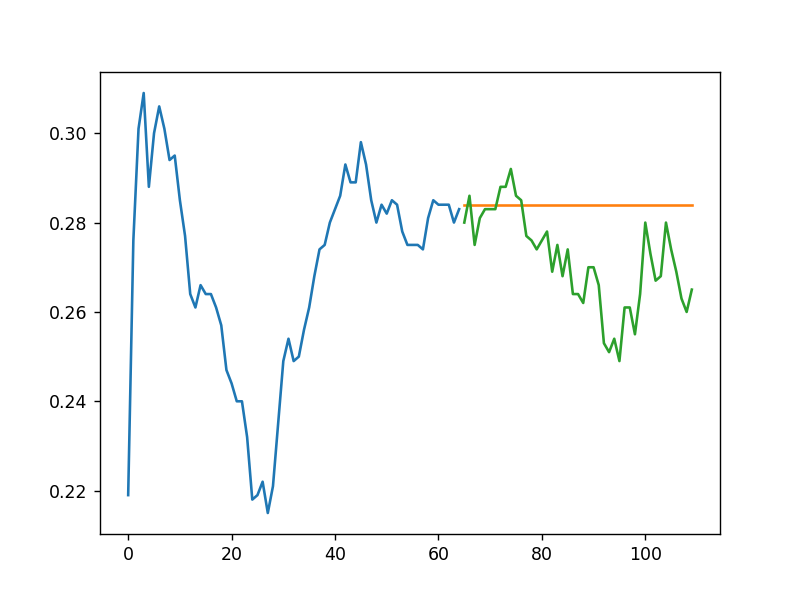

In [373]:
test = ba_LT.loc[65:,['BA']]
fore = baLT_model_fit.forecast(steps=len(ba_LT.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_LT.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [375]:
baNC_model = ARIMA(ba_NC.loc[:62, ['BA']], order=(0, 2, 1))
baNC_model_fit = baNC_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(baNC_model_fit.summary()))

baNC_fore = baNC_model_fit.forecast(steps=1)
print(baNC_fore)

                             ARIMA Model Results                              
Dep. Variable:                  D2.BA   No. Observations:                   61
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 209.906
Method:                       css-mle   S.D. of innovations              0.008
Date:                Wed, 23 Sep 2020   AIC                           -415.811
Time:                        11:49:49   BIC                           -411.590
Sample:                             2   HQIC                          -414.157
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ma.L1.D2.BA    -0.8449      0.097     -8.748      0.000      -1.034      -0.656
                                    Roots                                    
                  Real          Imaginary         

<IPython.core.display.Javascript object>


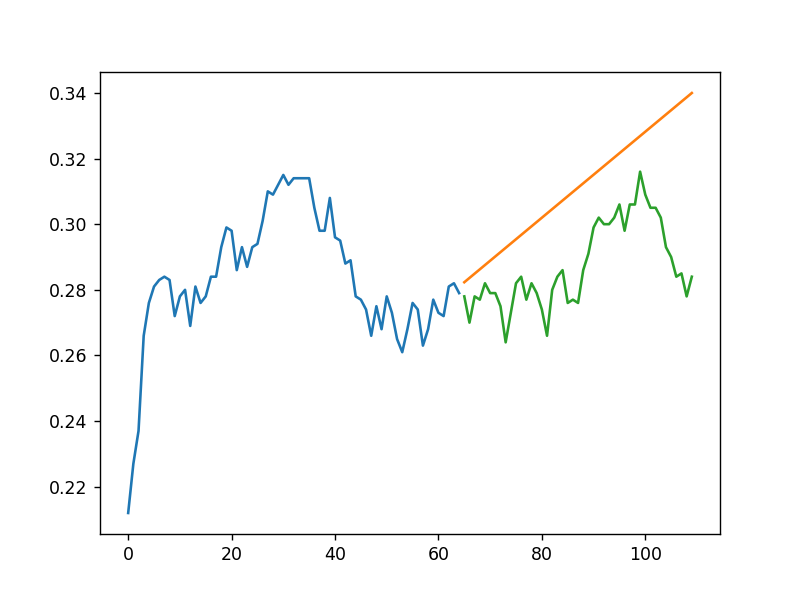

In [376]:
test = ba_NC.loc[65:,['BA']]
fore = baNC_model_fit.forecast(steps=len(ba_NC.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_NC.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [377]:
baOB_model = ARIMA(ba_OB.loc[:63, ['BA']], order=(1, 0, 1))
baOB_model_fit = baOB_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(baOB_model_fit.summary()))

baOB_fore = baOB_model_fit.forecast(steps=1)
print(baOB_fore)

                              ARMA Model Results                              
Dep. Variable:                     BA   No. Observations:                   64
Model:                     ARMA(1, 1)   Log Likelihood                 193.483
Method:                       css-mle   S.D. of innovations              0.012
Date:                Wed, 23 Sep 2020   AIC                           -378.967
Time:                        11:50:06   BIC                           -370.331
Sample:                             0   HQIC                          -375.565
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2855      0.011     25.009      0.000       0.263       0.308
ar.L1.BA       0.7912      0.117      6.769      0.000       0.562       1.020
ma.L1.BA       0.6641      0.105      6.333      0.0

<IPython.core.display.Javascript object>


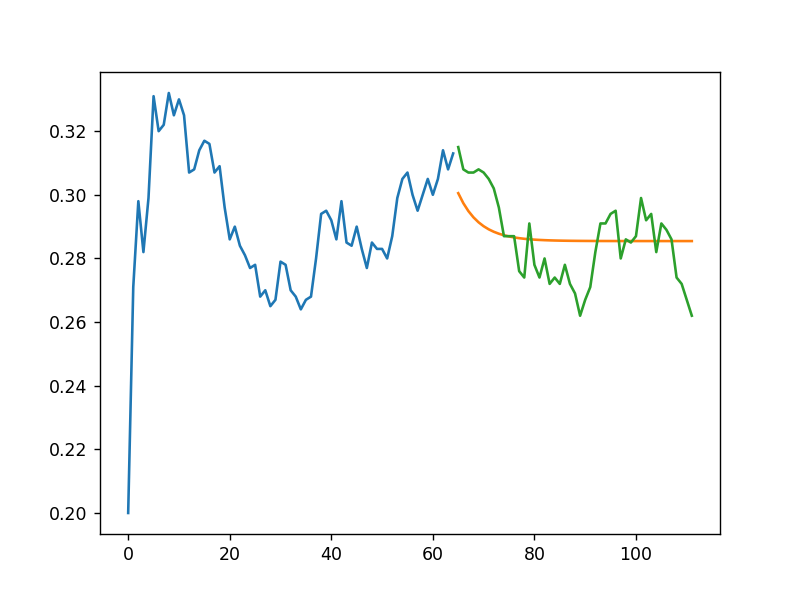

In [378]:
test = ba_OB.loc[65:,['BA']]
fore = baOB_model_fit.forecast(steps=len(ba_OB.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_OB.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [380]:
baSK_model = ARIMA(ba_SK.loc[:64, ['BA']], order=(2, 1, 0))
baSK_model_fit = baSK_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(baSK_model_fit.summary()))

baSK_fore = baSK_model_fit.forecast(steps=1)
print(baSK_fore)

                             ARIMA Model Results                              
Dep. Variable:                   D.BA   No. Observations:                   64
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 187.846
Method:                       css-mle   S.D. of innovations              0.013
Date:                Wed, 23 Sep 2020   AIC                           -369.693
Time:                        11:50:27   BIC                           -363.216
Sample:                             1   HQIC                          -367.141
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.BA     0.9874      0.138      7.178      0.000       0.718       1.257
ar.L2.D.BA    -0.4454      0.195     -2.281      0.023      -0.828      -0.063
                                    Roots           

<IPython.core.display.Javascript object>


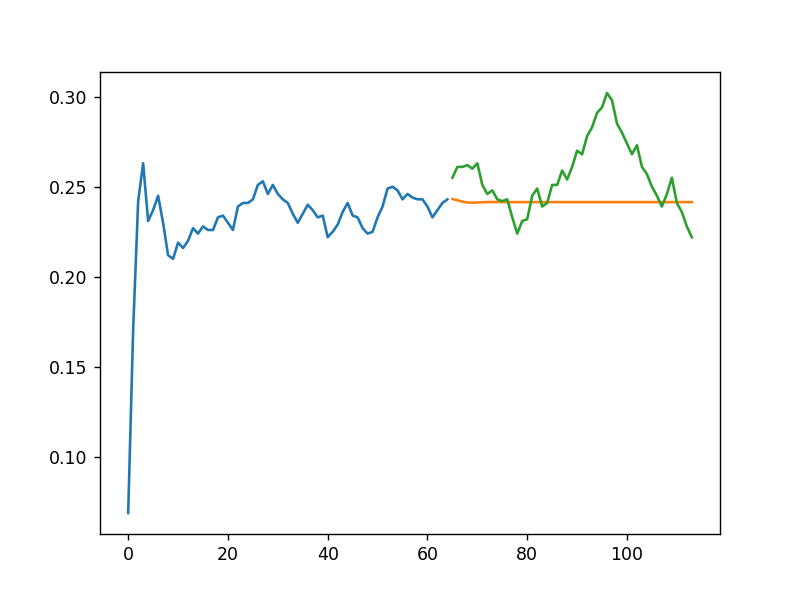

In [381]:
test = ba_SK.loc[65:,['BA']]
fore = baSK_model_fit.forecast(steps=len(ba_SK.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_SK.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [384]:
baSS_model = ARIMA(ba_SS.loc[:64, ['BA']], order=(0, 2, 1))
baSS_model_fit = baSS_model.fit(trend='nc', full_output=True, disp=True)
print("{}\n".format(baSS_model_fit.summary()))

baSS_fore = baSS_model_fit.forecast(steps=1)
print(baSS_fore)

                             ARIMA Model Results                              
Dep. Variable:                  D2.BA   No. Observations:                   63
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 210.485
Method:                       css-mle   S.D. of innovations              0.008
Date:                Wed, 23 Sep 2020   AIC                           -416.970
Time:                        11:50:50   BIC                           -412.684
Sample:                             2   HQIC                          -415.284
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ma.L1.D2.BA    -0.8378      0.076    -11.040      0.000      -0.987      -0.689
                                    Roots                                    
                  Real          Imaginary         

<IPython.core.display.Javascript object>


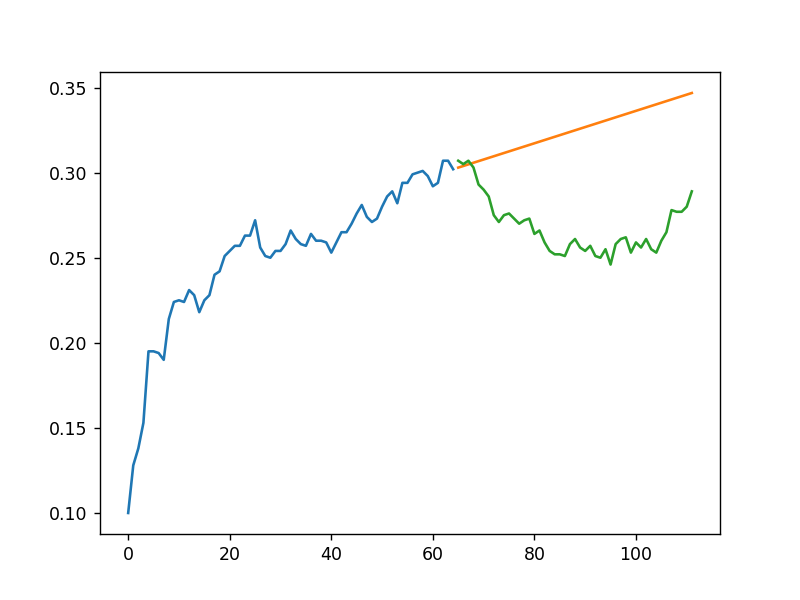

In [386]:
test = ba_SS.loc[65:,['BA']]
fore = baSS_model_fit.forecast(steps=len(ba_SS.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_SS.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()

In [391]:
baWO_model = ARIMA(ba_WO.loc[:65, ['BA']], order=(0, 1, 0))
baWO_model_fit = baWO_model.fit(trend='c', full_output=True, disp=True)
print("{}\n".format(baWO_model_fit.summary()))

baWO_fore = baWO_model_fit.forecast(steps=1)
print(baWO_fore)

                             ARIMA Model Results                              
Dep. Variable:                   D.BA   No. Observations:                   65
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 212.854
Method:                           css   S.D. of innovations              0.009
Date:                Wed, 23 Sep 2020   AIC                           -421.707
Time:                        11:52:09   BIC                           -417.358
Sample:                             1   HQIC                          -419.991
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.001     -0.434      0.665      -0.003       0.002

(array([0.28350769]), array([0.0091536]), array([[0.26556696, 0.30144842]]))


<IPython.core.display.Javascript object>


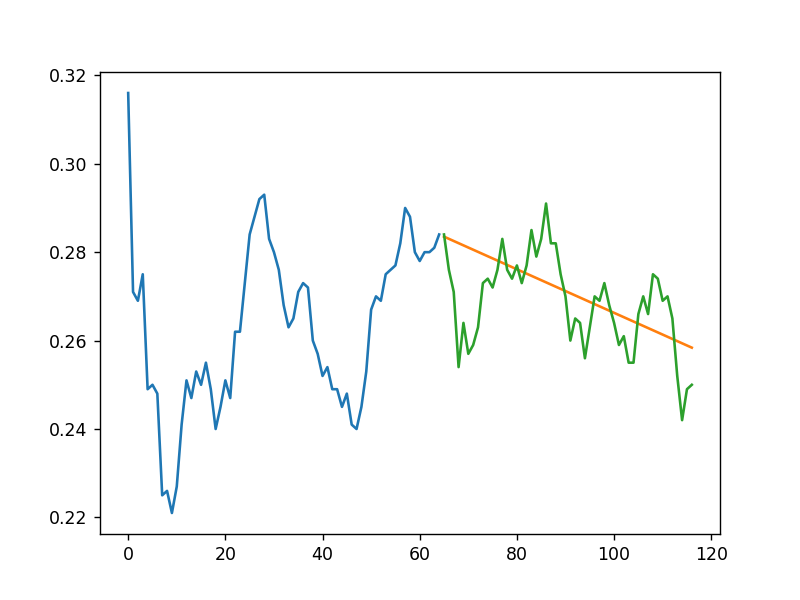

In [392]:
test = ba_WO.loc[65:,['BA']]
fore = baWO_model_fit.forecast(steps=len(ba_WO.loc[65:,['BA']]))
forecast = pd.DataFrame(fore[0], index=test.index, columns=test.columns)
plt.plot(ba_WO.loc[:64,'BA'])
plt.plot(forecast)
plt.plot(test)
plt.show()